In [1]:
import supervision as sv
import cv2
import numpy as np
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

def load_json_files(folder_path):
    json_data = []

    # List all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a JSON file
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            # Open and load the JSON file
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
                json_data.append(data)

    return json_data

In [6]:
test_sequence =  load_images_from_folder('C:/Studie/BEP/Data/Soccernet_tracking_data/calibration-2023/train')
json_test_sequence = load_json_files('C:/Studie/BEP/Data/Soccernet_tracking_data/calibration-2023/train')

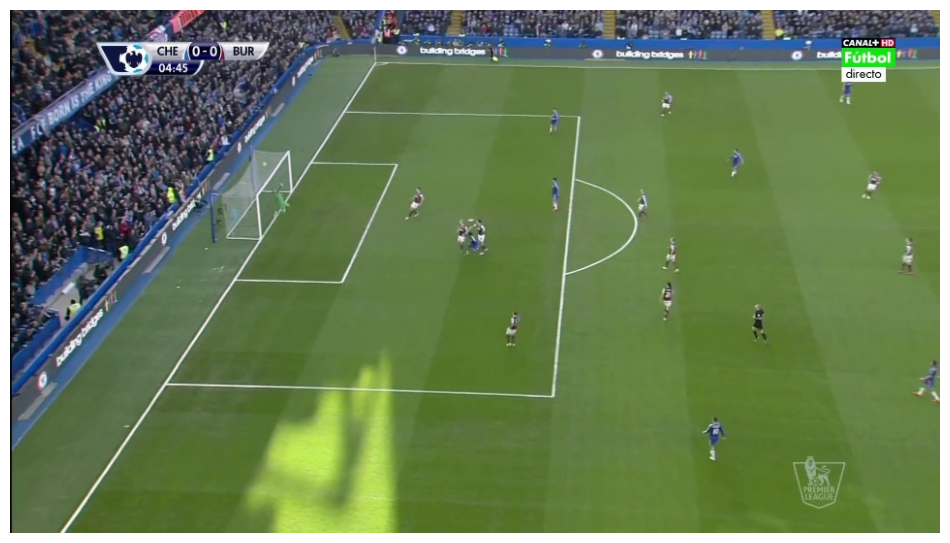

In [4]:
sv.plot_image(test_sequence[1])

In [7]:
#make a list of dictionaries which contain the json annotations for all the frames
json_test_sequence[1]

{'Circle left': [{'x': 0.6060677170753479, 'y': 0.32228705286979675},
  {'x': 0.6343020796775818, 'y': 0.3421296179294586},
  {'x': 0.6464530825614929, 'y': 0.3526389002799988},
  {'x': 0.6563020944595337, 'y': 0.3643147945404053},
  {'x': 0.6645156145095825, 'y': 0.37715739011764526},
  {'x': 0.6697655916213989, 'y': 0.39000001549720764},
  {'x': 0.6723958253860474, 'y': 0.4010925889015198},
  {'x': 0.6730520725250244, 'y': 0.4133518636226654},
  {'x': 0.6707552075386047, 'y': 0.42561110854148865},
  {'x': 0.667468786239624, 'y': 0.43845370411872864},
  {'x': 0.6549895405769348, 'y': 0.46004629135131836},
  {'x': 0.6395572423934937, 'y': 0.47639816999435425},
  {'x': 0.6234687566757202, 'y': 0.49040740728378296},
  {'x': 0.6103333234786987, 'y': 0.4991574287414551},
  {'x': 0.5958853960037231, 'y': 0.5061666369438171}],
 'Goal left crossbar': [{'x': 0.26541146636009216, 'y': 0.3558333218097687},
  {'x': 0.29885417222976685, 'y': 0.2737500071525574}],
 'Goal left post right': [{'x': 0.

In [22]:
#representation as points
def plot_keypoints_on_image(image_path, keypoints_dict):
    # Load the image
    image = image_path
    image_height, image_width = image.shape[:2]

    # Iterate through the dictionary and plot keypoints
    for label, keypoints in keypoints_dict.items():
        previous_point = None
        for point in keypoints:
            # Convert normalized coordinates to pixel coordinates
            x = int(point['x'] * image_width)
            y = int(point['y'] * image_height)

            # Draw a circle for each keypoint (radius=5, color=red, thickness=-1)
            cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

            # Draw a line connecting the previous point to the current point if there is one
            if previous_point is not None:
                cv2.line(image, previous_point, (x, y), (255, 0, 0), 2)  # Blue line with thickness of 2

            # Update the previous point
            previous_point = (x, y)

    return image




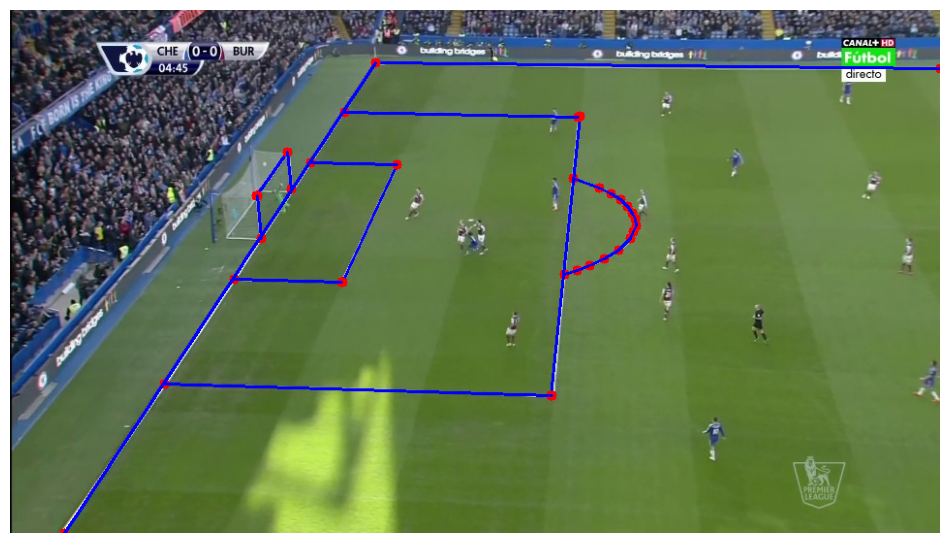

{'Circle left': [{'x': 0.6060677170753479, 'y': 0.32228705286979675}, {'x': 0.6343020796775818, 'y': 0.3421296179294586}, {'x': 0.6464530825614929, 'y': 0.3526389002799988}, {'x': 0.6563020944595337, 'y': 0.3643147945404053}, {'x': 0.6645156145095825, 'y': 0.37715739011764526}, {'x': 0.6697655916213989, 'y': 0.39000001549720764}, {'x': 0.6723958253860474, 'y': 0.4010925889015198}, {'x': 0.6730520725250244, 'y': 0.4133518636226654}, {'x': 0.6707552075386047, 'y': 0.42561110854148865}, {'x': 0.667468786239624, 'y': 0.43845370411872864}, {'x': 0.6549895405769348, 'y': 0.46004629135131836}, {'x': 0.6395572423934937, 'y': 0.47639816999435425}, {'x': 0.6234687566757202, 'y': 0.49040740728378296}, {'x': 0.6103333234786987, 'y': 0.4991574287414551}, {'x': 0.5958853960037231, 'y': 0.5061666369438171}], 'Goal left crossbar': [{'x': 0.26541146636009216, 'y': 0.3558333218097687}, {'x': 0.29885417222976685, 'y': 0.2737500071525574}], 'Goal left post right': [{'x': 0.29885417222976685, 'y': 0.272703

In [44]:
img_index = 1
#representation as lines
test_image = plot_keypoints_on_image(test_sequence[img_index], json_test_sequence[img_index])
sv.plot_image(test_image)
print(json_test_sequence[img_index])

In [15]:
sv.plot_image(test_img)

AttributeError: 'NoneType' object has no attribute 'ndim'

<Figure size 1200x1200 with 0 Axes>